In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

# Support Vector Machines

## Example Dataset 1

In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left at about (0.1, 4.1). As part of this exercise, you will also see how this outlier affects the SVM decision boundary.

In [2]:
data1 = loadmat('data/ex6data1.mat')

In [3]:
data = pd.DataFrame(data1['X'], columns=['X1', 'X2'])
data['y'] = data1['y']

### Visualize Data

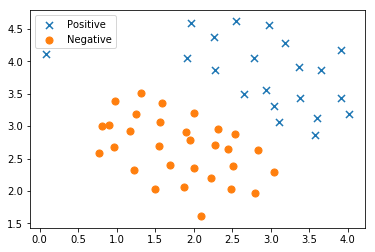

In [4]:
positive = data[data['y'] == 1]
negative = data[data['y'] == 0]

plt.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
plt.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
plt.legend();

In this part of the exercise, you will try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

The first part of this excercise is running `svmTrain.m.` with different C values, we will use SciKit Learn.

In [5]:
from sklearn import svm

In [6]:
for C in range(1,102, 5):
    svc = svm.LinearSVC(C=C, loss='hinge', max_iter=1000)
    svc.fit(data[['X1', 'X2']], data['y'])
    print(C, svc.score(data[['X1', 'X2']], data['y']))

1 0.9803921568627451
6 0.9803921568627451
11 0.9803921568627451
16 0.9803921568627451
21 0.9803921568627451
26 0.9803921568627451
31 0.9803921568627451
36 0.9803921568627451
41 0.9803921568627451
46 0.9803921568627451
51 0.9803921568627451
56 0.9803921568627451
61 0.9803921568627451
66 0.9803921568627451
71 0.9803921568627451
76 0.9411764705882353
81 1.0
86 0.9803921568627451
91 0.9411764705882353
96 0.9803921568627451
101 1.0


### SVM with Gaussian Kernels

In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples.

In [7]:
def gaussian_kernel(x1, x2, sigma=2):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

In [8]:
example1 = np.array([1.0, 2.0, 1.0])
example2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(example1, example2, sigma) #matches the exercise information

0.32465246735834974

## Example Dataset 2

The next part in ex6.m will load and plot dataset 2 (Figure 4). From the figure, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear
decision boundary that can perform reasonably well for the dataset.

In [9]:
data2 = loadmat('data/ex6data2.mat')

In [10]:
data = pd.DataFrame(data2['X'], columns=['X1', 'X2'])
data['y'] = data2['y']

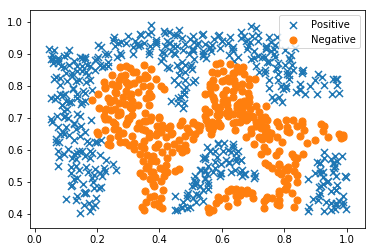

In [11]:
positive = data[data['y'] == 1]
negative = data[data['y'] == 0]

plt.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
plt.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
plt.legend();

In [12]:
X = np.array(data[['X1', 'X2']])
y = np.array(data['y'])

In [13]:
def gaussianKernelMatrix(X1, X2, sigma=0.1):
    """(Pre)calculates Gram Matrix K"""

    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            x1 = x1.flatten()
            x2 = x2.flatten()
            gram_matrix[i, j] = gaussian_kernel(x1, x2, sigma)
    return gram_matrix

In [14]:
C=0.1
clf = svm.SVC(C = C, kernel="precomputed")
model = clf.fit(gaussianKernelMatrix(X,X), y)

In [15]:
model.score(gaussianKernelMatrix(X,X), y)

0.9501738122827347

Hey, look at that! We were able to use out own Gaussian Kernel to get 95% accuracy!

In [16]:
clf = svm.SVC(C=100, kernel='rbf', gamma=10)
clf.fit(X, y)
clf.score(X, y)

0.9698725376593279

So, SciKit learn did a little better than us with some initial guess for parameters.

## Example Dataset 3

In the provided dataset, ex6data3.mat, you are given the variables X, y, Xval, yval. The provided code in ex6.m trains the SVM classifier using the training set (X, y) using parameters loaded from `dataset3Params.m`. Your task is to use the cross validation set Xval, yval to determine the best C and σ parameter to use. You should write any additional code necessary to help you search over the parameters C and $\sigma$. 

For both C and $\sigma$, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).

Note that you should try all possible pairs of values for C and $\sigma$ (e.g., C = 0.3 and $\sigma=0.1$). For example, if you try each of the 8 values listed above for C and for $\sigma^2$, you would end up training and evaluating (on the cross validation set) a total of $8^2=64$ different models.

In [17]:
data3 = loadmat('data/ex6data3.mat')

In [18]:
X = data3['X']
Xval = data3['Xval']
y = data3['y'].ravel()
yval = data3['yval'].ravel()

In [19]:
Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gammas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in Cs:
    for gamma in gammas:
        clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        clf.fit(X, y)
        score = clf.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

## Spam Classification

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exer cise, you will use SVMs to build your own spam filter.

You will be training a classifier to classify whether a given email, $x$, is spam ($y = 1$) or non-spam ($y = 0$). In particular, you need to convert each email into a feature vector $x \in R^n$.

The following parts of the exercise walk you through how such a feature vector can be constructed from an email, most of this walkthrough involves and already completed script being run on only a handful of examples, does not seem worth recreating as once we move to the training section of the exercise a train and test set is provided, already cleaned.

In [20]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

In [21]:
X_train = spam_train['X']
X_test = spam_test['Xtest']

y_train = spam_train['y'].ravel()
y_test = spam_test['ytest'].ravel()

### Training SVM for Spam Classification

In [22]:
from sklearn.model_selection import GridSearchCV

In [24]:
Cs = [0.01, 0.03, 0.1, 0.3, 1, 3]
gammas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
    
param_grid = {'C': Cs, 'gamma' : gammas}
clf = GridSearchCV(svm.SVC(), param_grid, cv=3)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
clf.score(X_test, y_test)

The optional exercises of building you own email dataframe is interesting, and I'm hoping to come back to that.